# Airbnb Price Trends

#### Calender DS

In [1]:
# import the libraries to handle table-like data and matrices
import numpy as np
import pandas as pd

# open and read the calendar csv file
df = pd.read_csv('J:/SJSU/Projects/Sem3/256/256/datasets/calendar_detail.csv') 

In [2]:
df.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00


In [3]:
df.count()

listing_id    16182640
date          16182640
available     16182640
price          5582376
dtype: int64

In [4]:
# Filter the dates with availability
df=df[df['available'] == 't']

In [5]:
df.count()

listing_id    5582376
date          5582376
available     5582376
price         5582376
dtype: int64

## Data Preprocessing

In [7]:
# change columns to be more workable format
df['price'] = df['price'].map(lambda x: str(x).lstrip('$').replace(',',''))
df['price'] = df['price'].map(lambda x: int(float(x)))

df['date'] = df['date'].map(lambda x: x.lstrip('"').rstrip('"'))
df['listing_id'] = df['listing_id'].map(lambda x: int(float(x)))

# change column data types 
df['price'] = pd.to_numeric(df['price'])
df['date'] = pd.to_datetime(df['date'])
df['listing_id'] = pd.to_numeric(df['listing_id'])

In [8]:
df.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,99
1,2515,2018-09-30,t,89
2,2515,2018-09-29,t,99
3,2515,2018-09-28,t,99
4,2515,2018-09-27,t,99


## Price Range Analysis 

In [9]:
# get the distinct dates in the calendar dataset 
distinctDays = df['date'].unique()

# Stores the list of average prices per day of the year
averagePricePerDay=[]

# find the average price on every day
for i in range(len(distinctDays)):
    selectedDay = df['date'] == distinctDays[i]
    priceOfSelectedDay = df['price'][selectedDay]
    averagePricePerDay.append(priceOfSelectedDay.mean())

(0, 365)

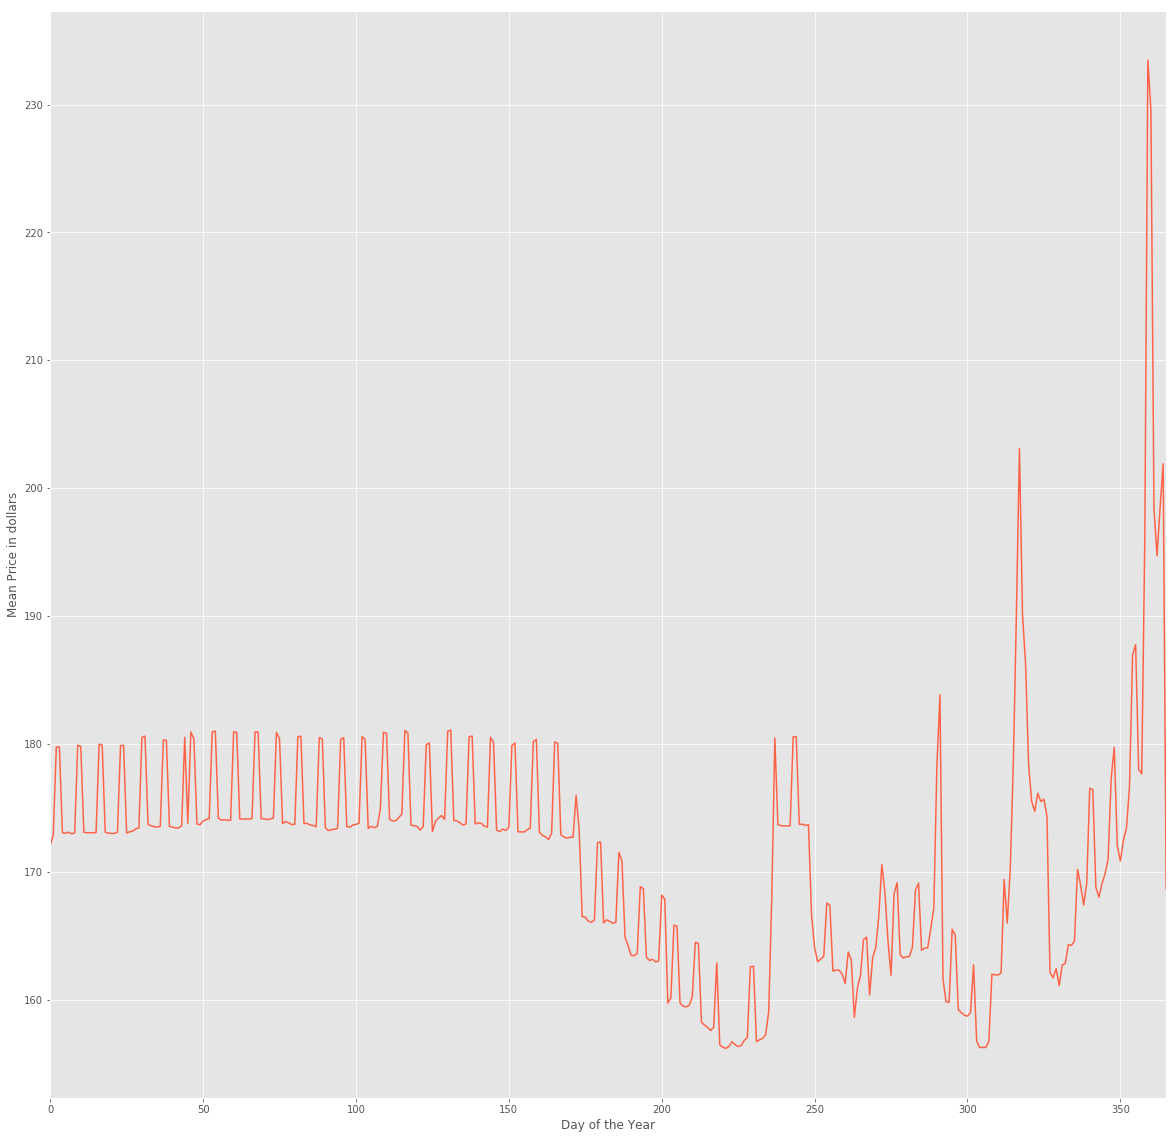

In [16]:
# import the library for visualization - plotting
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.xlabel('Day of the Year')
plt.ylabel('Mean Price in dollars')
plt.plot(range(len(distinctDays)), averagePricePerDay, color = 'tomato')
plt.style.use('ggplot')
plt.xlim(0, 365)

### Conclusion:

We can observe that the price surge is during the end of the yeat and the highest is during the Christams and the New Years. Also, we can observe that there are intermittent surges every 6-7 days. This must be beacuase of weekends. 

#### Listings Detail DS

In [39]:
# open and read the Listings Detail csv file
listings_Data = pd.read_csv('J:/SJSU/Projects/Sem3/256/256/datasets/listings_detail.csv') 

C:\Users\manvi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Preprocessing

In [40]:
listings_df=listings_Data[['number_of_reviews','price','review_scores_rating'], axis=1]

In [23]:
# change columns to be more workable format
listings_df['price'] = listings_df['price'].map(lambda x: str(x).lstrip('$').replace(',',''))
listings_df['price'] = listings_df['price'].map(lambda x: int(float(x)))

# replacing NaN values with 0
listings_df.fillna(0, inplace=True)

In [24]:
listings_df.head()

,number_of_reviews,price,review_scores_rating
0,0,110,0.0
1,2,50,100.0
2,21,125,95.0
3,0,100,0.0
4,0,300,0.0


### Price Analysis On Reviews

In [38]:
listings = listings_df[['number_of_reviews', 'price']]
ReviewsByPrice = listings.sort_values(by = 'price')

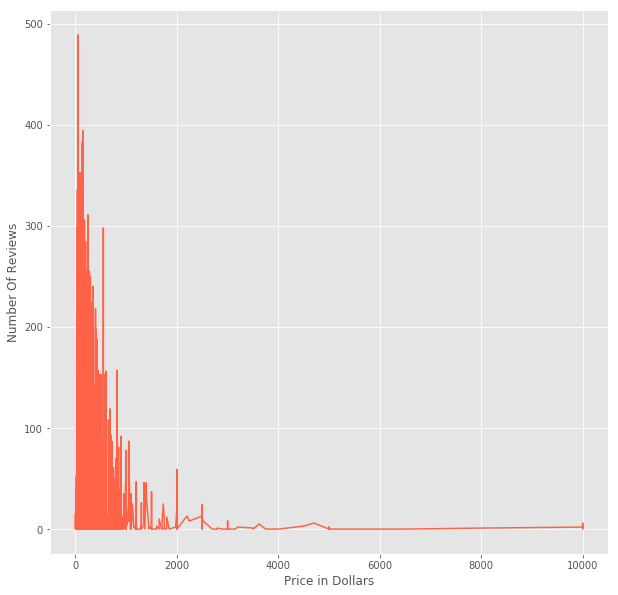

In [36]:
plt.figure(figsize=(10,10))
plt.xlabel('Price in Dollars')
plt.ylabel('Number Of Reviews')
plt.plot(ReviewsByPrice.price, ReviewsByPrice.number_of_reviews, color = 'tomato')
plt.style.use('ggplot')

#### Conclusion

In the above graph, we can observe that the highest number of ratings are given to the properties that are approximately below $800. Another interesting observation is that the above graph also represents "Long-tail distribution"

According to Wikipedia-

" 
An example of a power law graph showing *popularity* ranking. To the right is the long tail; to the left are the few that dominate. In this example, the cutoff is chosen so that areas of both regions are equal.
In statistics and business, a long tail of some distributions of numbers is the portion of the distribution having a large number of occurrences far from the "head" or central part of the distribution. The distribution could involve popularities, random numbers of occurrences of events with various probabilities, etc.
"

We can deduce from the above graph, that most of the bookings are booked that are in the range $ 100 - $ 700.

### Price Analysis based on Zip codes

In [44]:
listings_df1 = listings_Data.filter(['price','zipcode','host_is_superhost'], axis=1)

In [45]:
listings_df1.head()

,price,zipcode,host_is_superhost
0,$110.00,11105,f
1,$50.00,NaN,f
2,$125.00,10464,f
3,$100.00,10464,f
4,$300.00,10464,f


### Data Preprocessing

In [46]:
listings_df1 = listings_df1.dropna()

In [56]:
listings_df1['price'] = listings_df1['price'].map(lambda x: str(x).lstrip('$').replace(',',''))
listings_df1['price'] = listings_df1['price'].map(lambda x: int(float(x)))

#'1110-3233' - for numbers like these
listings_df1['zipcode'] = listings_df1['zipcode'].map(lambda x: str(x).replace('-',''))

# add only yhe first five digits of a pin code 
zipcodes = []
for i in range(len(listings_df1)):
    zipcode = listings_df1['zipcode'][i][:5]
    zipcodes.append(zipcode)
listings_df1['zipcode'] = zipcodes

listings_df1 = listings_df1.reset_index(drop=True)

In [66]:
from collections import Counter

zip_counts = Counter(listings_df1.zipcode)

zipcodes = pd.DataFrame.from_dict(zip_counts, orient='index').sort_values(by=0)
zipcodes['price'] = 0

for i, row in zipcodes.iterrows():
    selectedZipCode = listings_df1.zipcode == i
    zipPrice = listings_df1[selectedZipCode]
    zipcodes.loc[index, 'price'] = zipPrice.price.mean()

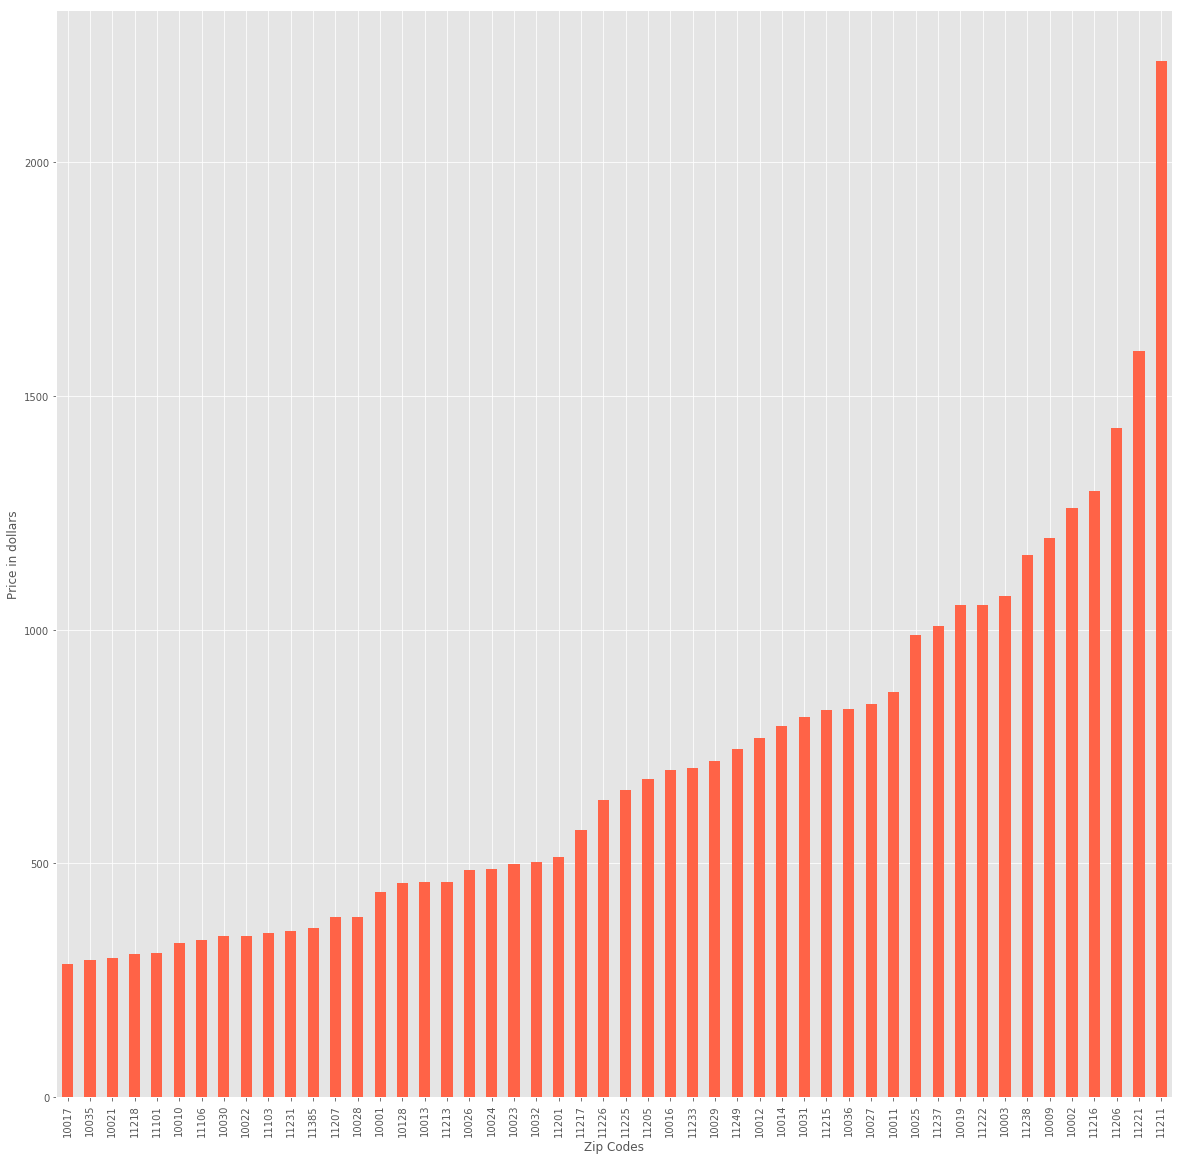

In [65]:
# plot the graph to display the zipcodes based on average price

plt.xlabel('Zip Codes')
plt.ylabel('Price in dollars')
highest_zip = zips.tail(50)
highest_zip[0].plot(kind='bar',figsize=(20,20), color="tomato")
plt.style.use('ggplot')